In [1]:
# Importo las librerías
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

LDA y QDA

In [3]:
# Importo los datos
Datos = pd.read_csv('penguins.csv')
Datos.dropna(inplace = True)
# Nos quedamos con solo dos variables para interpretar mejor las relaciones entre los datos
X= Datos[["bill_length_mm","body_mass_g"]]
y = Datos[["species"]]

In [4]:
y.value_counts()

species  
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Text(0, 0.5, 'Peso en gramos')

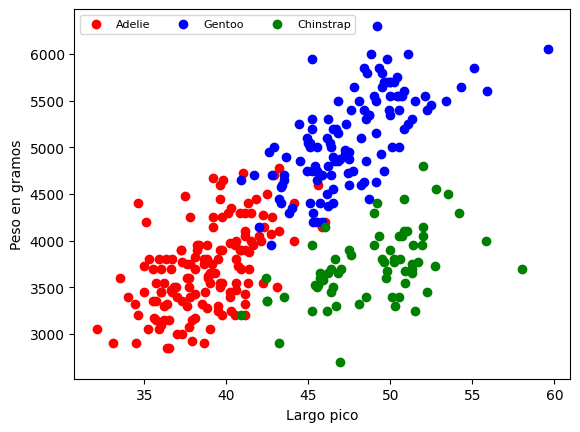

In [5]:
# Visualizamos la info
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red")
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue")
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green")
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

In [6]:
# Importo los modelos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Inicializamos los modelos
lda = LinearDiscriminantAnalysis(store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
gnb = GaussianNB().fit(X,y.values.ravel())

# Entrenamos los modelos
lda.fit(X,y.values.ravel())
qda.fit(X,y.values.ravel())

,priors,None
,reg_param,0.0
,store_covariance,True
,tol,0.0001


In [7]:
from matplotlib.patches import Ellipse

def plot_elipse(mu, cov, color='red'):
    # Cálculo de los autovalores y autovectores para la matriz de covarianza
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Ordena los autovalores en orden descendente
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    # Ángulo de rotación de la elipse (en grados)
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    # Ancho y alto de la elipse (2 desviaciones estándar)
    width, height = 2 * np.sqrt(eigvals) * 2  # Factor 2 para 2 desviaciones estándar

    # Crear la elipse
    ellipse = Ellipse(xy=mu, width=width, height=height, angle=theta, edgecolor=color, facecolor='none')

    plt.gca().add_patch(ellipse)

Text(0, 0.5, 'Peso en gramos')

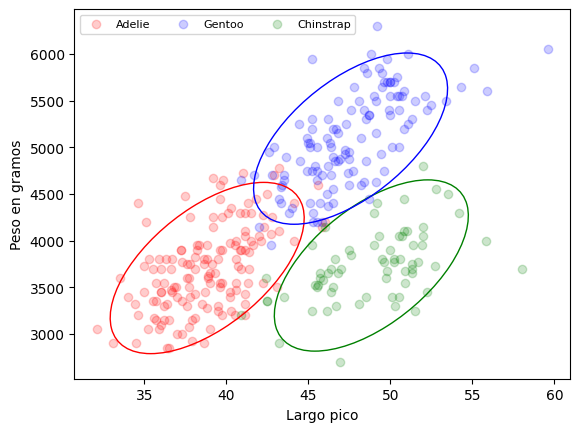

In [8]:
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red",alpha=0.2)
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue", alpha=0.2)
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green",alpha=0.2)
plot_elipse(lda.means_[0], lda.covariance_, color='red')
plot_elipse(lda.means_[1], lda.covariance_, color='green')
plot_elipse(lda.means_[2], lda.covariance_, color='blue')
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

Text(0, 0.5, 'Peso en gramos')

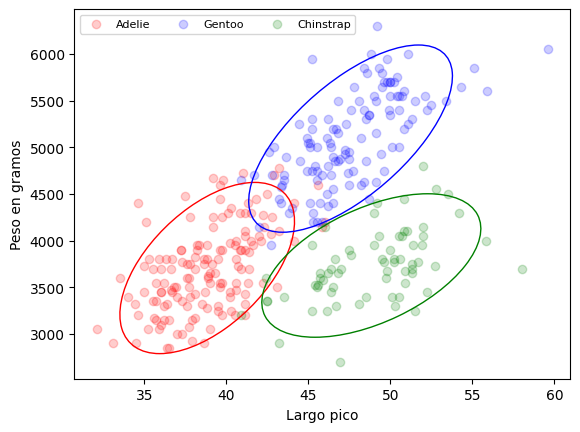

In [9]:
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red",alpha=0.2)
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue", alpha=0.2)
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green",alpha=0.2)
plot_elipse(qda.means_[0], qda.covariance_[0], color='red')
plot_elipse(qda.means_[1], qda.covariance_[1], color='green')
plot_elipse(qda.means_[2], qda.covariance_[2], color='blue')
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

Text(0, 0.5, 'Peso en gramos')

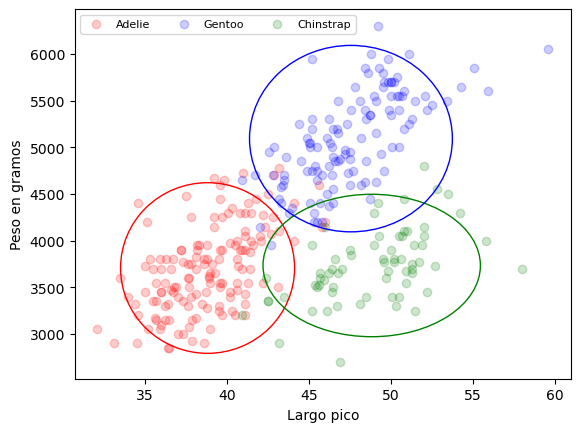

In [53]:
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red",alpha=0.2)
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue", alpha=0.2)
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green",alpha=0.2)
plot_elipse(gnb.theta_[0], np.diag(gnb.var_[0]), color='red')
plot_elipse(gnb.theta_[1], np.diag(gnb.var_[1]), color='green')
plot_elipse(gnb.theta_[2], np.diag(gnb.var_[2]), color='blue')
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

C:\Users\marqu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Peso en gramos')

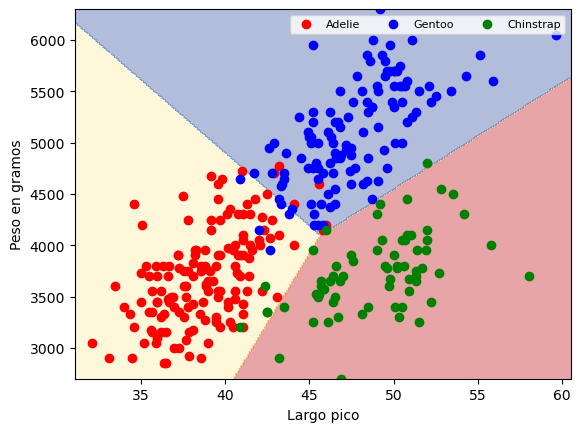

In [55]:
x_min, x_max = X['bill_length_mm'].min() - 1, X['bill_length_mm'].max() + 1
y_min, y_max = X["body_mass_g"].min() - 1, X["body_mass_g"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predecir en toda la malla de puntos
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i == 'Adelie' else 2 if i == 'Gentoo' else 0 for i in Z])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red")
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue")
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green")
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

C:\Users\marqu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Peso en gramos')

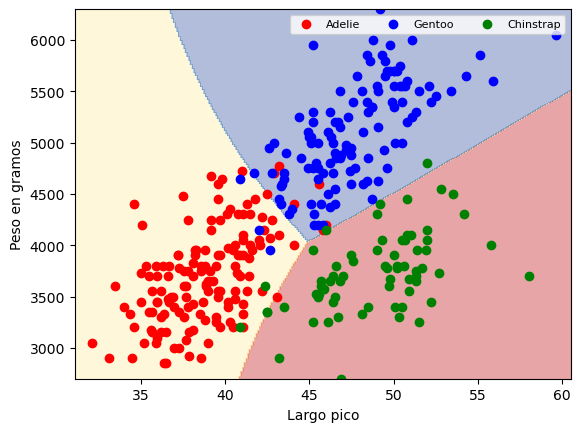

In [57]:
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i == 'Adelie' else 2 if i == 'Gentoo' else 0 for i in Z])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red")
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue")
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green")
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

C:\Users\marqu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Peso en gramos')

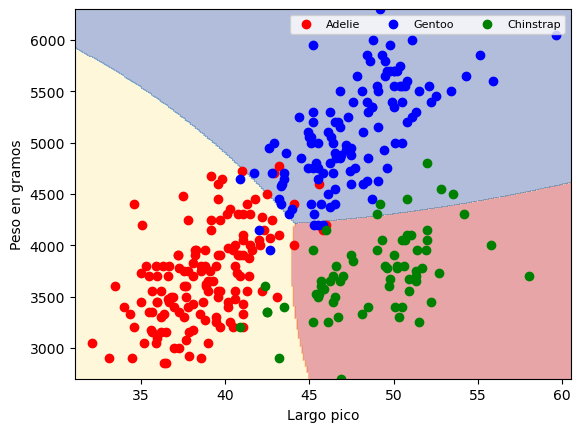

In [59]:
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array([1 if i == 'Adelie' else 2 if i == 'Gentoo' else 0 for i in Z])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
Adelie =plt.scatter(Datos[Datos["species"]=='Adelie']["bill_length_mm"], Datos[Datos["species"]=='Adelie']["body_mass_g"],c="red")
Gentoo =plt.scatter(Datos[Datos["species"]=='Gentoo']["bill_length_mm"], Datos[Datos["species"]=='Gentoo']["body_mass_g"],c="blue")
Chinstrap =plt.scatter(Datos[Datos["species"]=='Chinstrap']["bill_length_mm"], Datos[Datos["species"]=='Chinstrap']["body_mass_g"],c="green")
plt.legend((Adelie,Gentoo,Chinstrap),
           ('Adelie','Gentoo','Chinstrap'),
           scatterpoints=1,
           ncol=3,
           fontsize=8)
plt.xlabel("Largo pico")
plt.ylabel("Peso en gramos")

Accuracy

In [10]:
# Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializamos los modelos
lda = LinearDiscriminantAnalysis(store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
gnb = GaussianNB().fit(X_train, y_train.values.ravel())

# Entrenamos los modelos
lda.fit(X_train, y_train.values.ravel())
qda.fit(X_train, y_train.values.ravel())

print("Accuracy LDA = {}".format(accuracy_score(y_test,lda.predict(X_test))))
print("Accuracy QDA = {}".format(accuracy_score(y_test,qda.predict(X_test))))
print("Accuracy Bayes = {}".format(accuracy_score(y_test,gnb.predict(X_test))))

Accuracy LDA = 0.95
Accuracy QDA = 0.95
Accuracy Bayes = 0.94


In [11]:
from sklearn.metrics import roc_auc_score
print("AUC ROC LDA = {}".format(roc_auc_score([0 if i == 'Adelie' else 2 if i == 'Gentoo' else 1 for i in y_test["species"]], lda.predict_proba(X_test),multi_class = 'ovr')))
print("AUC ROC QDA = {}".format(roc_auc_score([0 if i == 'Adelie' else 2 if i == 'Gentoo' else 1 for i in y_test["species"]],qda.predict_proba(X_test),multi_class = 'ovr')))
print("AUC ROC Bayes = {}".format(roc_auc_score([0 if i == 'Adelie' else 2 if i == 'Gentoo' else 1 for i in y_test["species"]],gnb.predict_proba(X_test),multi_class = 'ovr')))


AUC ROC LDA = 0.9950666217974905
AUC ROC QDA = 0.9962463561908338
AUC ROC Bayes = 0.9853648575151599
